# Load the Dataset

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import fetch_openml

def load_dataset():
    mnist = fetch_openml('mnist_784', version=1)
    mnist.keys()
    X, y = mnist['data'], mnist['target']
    X_train, X_test, labels_train, labels_test = X[:60000], X[60000:], y[:60000], y[60000:]
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

In [42]:
X_train, y_train, X_test, y_test = load_dataset()

Lets peek at a digit in the dataset

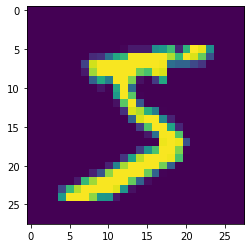

In [43]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

This looks like a number 5 and indeed that what the label tells us too

In [44]:
y_train[0]

'5'

Note that the label is a string. Most ML model expect numbers, so let's cast y to integer:

In [45]:
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

# Preprocess the dataset

For this binary logistic regression model, we will specifically recognize if the digit is a 2 or 7. Here, let Y = 1 for all the 7’s digits in the dataset, and use Y = −1 for 2. We will use
regularized logistic regression.

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [47]:
indexOf_2_7s = (y_train == 2).astype('int') + (y_train == 7).astype('int') # 1 for all 2s and 7s, 0s for all the other digits

X_train27 = X_train[indexOf_2_7s.astype('bool')].astype('float') # only keep 2 and 7s in the dataset and get rid of every thing else
y_train27 = y_train[indexOf_2_7s.astype('bool')].astype('float') # do the same for labels. get rid of all labels except for 2s and 7s
y_train27[y_train27 == 2] = -1
y_train27[y_train27 == 7] = 1

indexOf_2_7s_test = (y_test == 2).astype('int') + (y_test == 7).astype('int')
X_test27 = X_test[indexOf_2_7s_test.astype('bool')].astype('float')
y_test27 = y_test[indexOf_2_7s_test.astype('bool')].astype('float')
y_test27[y_test27 == 2] = -1
y_test27[y_test27 == 7] = 1

In [48]:
print(X_train27.shape)
print(y_train27.shape)
print(X_test27.shape)
print(y_test27.shape)

(12223, 784)
(12223,)
(2060, 784)
(2060,)


# Build the Binary Logistic Regression Model

In part a, we calculated the equation for gradient descent, i.e.,

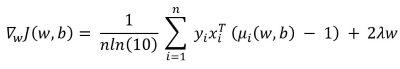

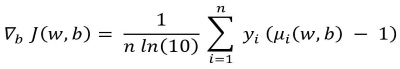

In [49]:
def grad_Jw(w, b, X, y, lambd):
    return np.mean(((mu(w, b, X, y) - 1)*y)[:,None]*X, axis = 0) +2*lambd*w

In [50]:
def grad_Jb(w, b, X, y):
    return np.mean((mu(w, b, X, y) - 1)*y, axis = 0)

Therefore to calculate the gradient, we need 'mu', which is given by:

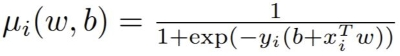

In [51]:
def mu(w, b, X, y):
    return 1/(1+np.exp(-y*(b + X.dot(w))))

The objective function is given by the equation:

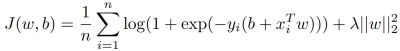

In [52]:
def J(w, b, X, y, lambd = 0.1):
    return np.mean(np.log(1+np.exp(-y*(b + X.dot(w))))) + lambd*w.dot(w)

Implement the gradient descent

In [53]:
def grad_descent(step, X, y, lambd = 0.1, tolerance=1e-2):
    n, d = X.shape
    w_init = np.zeros(d)
    b_init = 0
    iteration = 0
    w = w_init
    b = b_init
    w_prev = w_init + np.inf
    loss = []
    w_history = []
    b_history = []
    print("Training...")
    while True:
        iteration += 1
        w_prev = np.copy(w)
        w = w - step*grad_Jw(w, b, X, y, lambd)
        b = b - step*grad_Jb(w, b, X, y)
        loss.append(J(w, b, X, y, lambd))
        w_history.append(w)
        b_history.append(b)
        if np.sum(abs(w_prev - w)) < tolerance:
            print("Converged")
            break
        print('Iteration: ', iteration, 'Loss: ', loss[-1])
    return w, b, loss, w_history, b_history

# Train the model

PART B.

In [54]:
w, b, loss, w_history, b_history = grad_descent(0.1, X_train27, y_train27, lambd = 0.1)

Training...
Iteration:  1 Loss:  0.5379033654758291
Iteration:  2 Loss:  0.4472036741869556
Iteration:  3 Loss:  0.3906893951600272
Iteration:  4 Loss:  0.3533289118900081
Iteration:  5 Loss:  0.32737739588363746
Iteration:  6 Loss:  0.3086303360016554
Iteration:  7 Loss:  0.29466247224521364
Iteration:  8 Loss:  0.2839954774444582
Iteration:  9 Loss:  0.2756847094268647
Iteration:  10 Loss:  0.26910212128149835
Iteration:  11 Loss:  0.2638159936465849
Iteration:  12 Loss:  0.25952107698809834
Iteration:  13 Loss:  0.25599629881382846
Iteration:  14 Loss:  0.2530782177839683
Iteration:  15 Loss:  0.25064382797242685
Iteration:  16 Loss:  0.2485991076534214
Iteration:  17 Loss:  0.24687120547294028
Iteration:  18 Loss:  0.24540299228600265
Iteration:  19 Loss:  0.24414918873997837
Iteration:  20 Loss:  0.24307356513167044
Iteration:  21 Loss:  0.2421468851038347
Iteration:  22 Loss:  0.24134537439019044
Iteration:  23 Loss:  0.2406495660593925
Iteration:  24 Loss:  0.24004341963745207
I

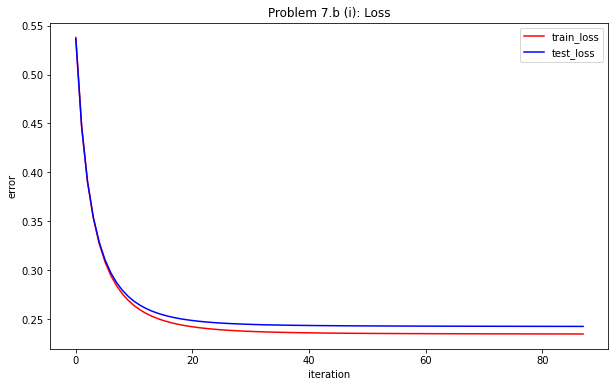

In [55]:
# part b (i)
test_loss = [J(w, b, X_test27, y_test27, lambd = 0.1) for w, b in zip(w_history, b_history)]

plt.figure(figsize = (10, 6))
plt.plot(loss, '-r', label = 'train_loss')
plt.plot(test_loss, '-b', label = 'test_loss')
plt.title('Problem 7.b (i): Loss')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

In [56]:
# part b (ii)
def predict(X, w, b):
    return np.sign(b + np.dot(X, w))

def missclassification_error(y_pred, y_true): 
    return 1- np.mean(y_pred == y_true)

In [57]:
y_train_pred = [predict(X_train27, w, b) for w, b in zip(w_history, b_history)]
train_error = [missclassification_error(y_train_pred, y_train27) for y_train_pred in y_train_pred]

y_test_pred = [predict(X_test27, w, b) for w, b in zip(w_history, b_history)]
test_error = [missclassification_error(y_test_pred, y_test27) for y_test_pred in y_test_pred]

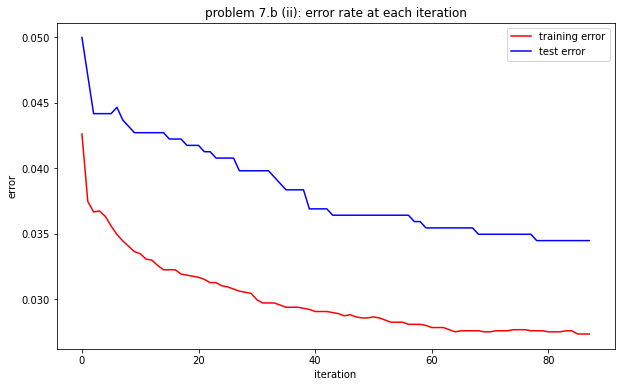

In [58]:
#plot
plt.figure(figsize=(10,6))
plt.plot(train_error, '-r', label = 'training error')
plt.plot(test_error, '-b', label = "test error")
plt.title('problem 7.b (ii): error rate at each iteration')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

PART C

In [60]:
def Stochastic_GD(X, y, step, batch_size, lambd = 0.1, epochs=1000, tolerance = 1e-2):
    n, d = X.shape
    
    w_init = np.zeros(d)
    b_init = 0
    iteration = 0

    w = w_init
    b = b_init
    w_prev = w_init + np.inf
    loss = []
    w_history = []
    b_history = []
    print("Training....")
    while iteration < epochs:
        
        #pick n random elements for the gradient calculation
        idx = np.random.permutation(np.arange(n))[:batch_size]
        X_batch = X[idx]
        y_batch = y[idx]
        
        iteration += 1
        w_prev = np.copy(w)
        w = w - step * grad_Jw(w, b, X_batch, y_batch, lambd)
        b = b - step * grad_Jb(w, b, X_batch, y_batch)
        loss.append(J(w, b, X, y, lambd))
        w_history.append(w)
        b_history.append(b)
        if np.sum(abs(w_prev - w)) < tolerance:
            print("Converged")
            break
        print('Iteration: ', iteration, 'Loss: ', loss[-1])
    return loss, w, b, w_history, b_history

In [68]:
loss, w, b, w_history, b_history = Stochastic_GD(X_train27, y_train27, step = 0.01, batch_size = 1, epochs = 300)

Training....
Iteration:  1 Loss:  0.6719078786437508
Iteration:  2 Loss:  0.6486684357802383
Iteration:  3 Loss:  0.6332110019859986
Iteration:  4 Loss:  0.6364267053954277
Iteration:  5 Loss:  0.5917899557829179
Iteration:  6 Loss:  0.5939055727065349
Iteration:  7 Loss:  0.5767507151169982
Iteration:  8 Loss:  0.5730654278835146
Iteration:  9 Loss:  0.5437152693655776
Iteration:  10 Loss:  0.5295524949272351
Iteration:  11 Loss:  0.5189450232249195
Iteration:  12 Loss:  0.5121639923935558
Iteration:  13 Loss:  0.506142048649156
Iteration:  14 Loss:  0.5191463790932718
Iteration:  15 Loss:  0.520966141399463
Iteration:  16 Loss:  0.49149756765923824
Iteration:  17 Loss:  0.4878832174253078
Iteration:  18 Loss:  0.4712015107482017
Iteration:  19 Loss:  0.47608187800709145
Iteration:  20 Loss:  0.47793925799634335
Iteration:  21 Loss:  0.45021611687995744
Iteration:  22 Loss:  0.44938211783877374
Iteration:  23 Loss:  0.43361974130289505
Iteration:  24 Loss:  0.42344420536655303
Iterati

In [69]:
test_loss = [J(w, b, X_test27, y_test27, lambd = 0.1) for w, b in zip(w_history, b_history)]

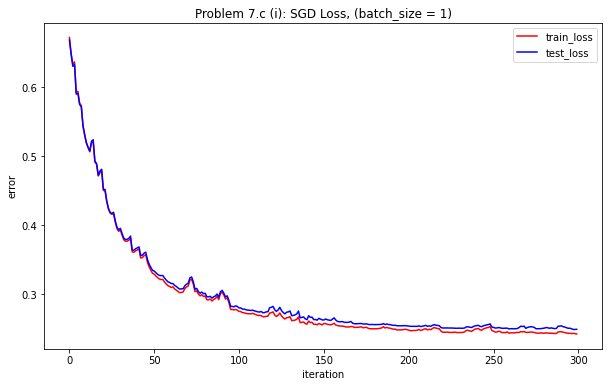

In [70]:
# part c (i)
plt.figure(figsize = (10,6))
plt.plot(loss, '-r', label = 'train_loss')
plt.plot(test_loss, '-b', label = 'test_loss')
plt.title('Problem 7.c (i): SGD Loss, (batch_size = 1)')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

In [71]:
# part c (ii)
y_train_pred = [predict(X_train27, w, b) for w, b in zip(w_history, b_history)]
train_error = [missclassification_error(y_train_pred, y_train27) for y_train_pred in y_train_pred]

y_test_pred = [predict(X_test27, w, b) for w, b in zip(w_history, b_history)]
test_error = [missclassification_error(y_test_pred, y_test27) for y_test_pred in y_test_pred]

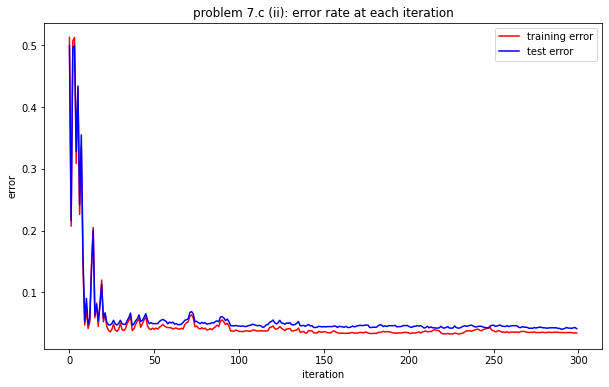

In [72]:
#plot
plt.figure(figsize=(10,6))
plt.plot(train_error, '-r', label = 'training error')
plt.plot(test_error, '-b', label = "test error")
plt.title('problem 7.c (ii): error rate at each iteration')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

PART D

In [73]:
loss, w, b, w_history, b_history = Stochastic_GD(X_train27, y_train27, step = 0.01, batch_size = 100, epochs = 300)

Training....
Iteration:  1 Loss:  0.6757659451061574
Iteration:  2 Loss:  0.6602015525759861
Iteration:  3 Loss:  0.6457512368695643
Iteration:  4 Loss:  0.6322434857900724
Iteration:  5 Loss:  0.6187319575403999
Iteration:  6 Loss:  0.6046828995276811
Iteration:  7 Loss:  0.5909752966191674
Iteration:  8 Loss:  0.5793886534542172
Iteration:  9 Loss:  0.5666004740702415
Iteration:  10 Loss:  0.5553402010251228
Iteration:  11 Loss:  0.5444930632687095
Iteration:  12 Loss:  0.5331603347554263
Iteration:  13 Loss:  0.5234914624279172
Iteration:  14 Loss:  0.5139980468096291
Iteration:  15 Loss:  0.5050016394959677
Iteration:  16 Loss:  0.4964064411954468
Iteration:  17 Loss:  0.48789634471096116
Iteration:  18 Loss:  0.48057092833251475
Iteration:  19 Loss:  0.4731185199824902
Iteration:  20 Loss:  0.4654708872958677
Iteration:  21 Loss:  0.45878085095014143
Iteration:  22 Loss:  0.4526857100500565
Iteration:  23 Loss:  0.4454304788361303
Iteration:  24 Loss:  0.4401830344766864
Iteration

In [74]:
test_loss = [J(w, b, X_test27, y_test27, lambd = 0.1) for w, b in zip(w_history, b_history)]

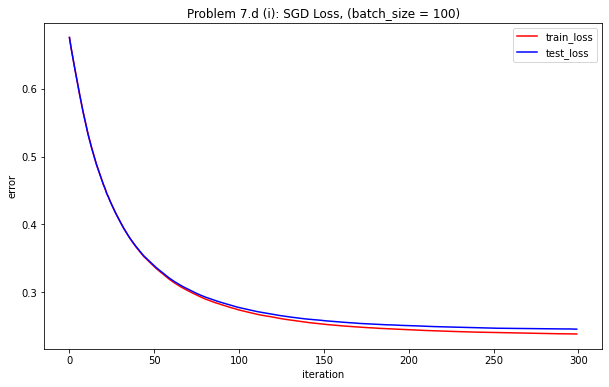

In [78]:
# part d (i)
plt.figure(figsize = (10,6))
plt.plot(loss, '-r', label = 'train_loss')
plt.plot(test_loss, '-b', label = 'test_loss')
plt.title('Problem 7.d (i): SGD Loss, (batch_size = 100)')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

In [79]:
# part d (ii)
y_train_pred = [predict(X_train27, w, b) for w, b in zip(w_history, b_history)]
train_error = [missclassification_error(y_train_pred, y_train27) for y_train_pred in y_train_pred]

y_test_pred = [predict(X_test27, w, b) for w, b in zip(w_history, b_history)]
test_error = [missclassification_error(y_test_pred, y_test27) for y_test_pred in y_test_pred]

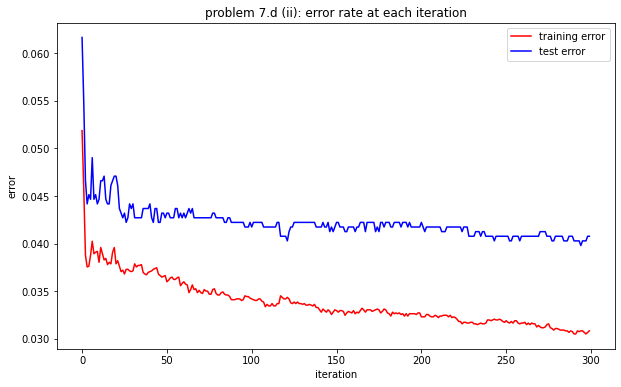

In [81]:
#plot
plt.figure(figsize=(10,6))
plt.plot(train_error, '-r', label = 'training error')
plt.plot(test_error, '-b', label = "test error")
plt.title('problem 7.d (ii): error rate at each iteration')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()